In [ ]:
!apt update
!apt install -y ffmpeg
!pip install ffmpeg-python


Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Ign:3 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Get:4 https://r2u.stat.illinois.edu/ubuntu jammy Release [5,713 B]
Get:5 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:6 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:7 https://r2u.stat.illinois.edu/ubuntu jammy Release.gpg [793 B]
Get:8 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [908 kB]
Hit:10 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:13 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,552 k

Lab Task 1: Setup and Basic **Extraction**

In [ ]:
import ffmpeg
import os

def extract_and_save_frames(video_path, output_dir, frame_rate=1):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    try:
        (
            ffmpeg
            .input(video_path)
            .filter('fps', fps=frame_rate)
            .output(f'{output_dir}/frame_%04d.png')
            .run(capture_stderr=True, capture_stdout=True)
        )
        print(f"Frames saved in {output_dir}")
    except ffmpeg.Error as e:
        print(f"An error occurred: {e.stderr.decode()}")

video_path = 'good.mov'
output_dir = 'extract and save'
extract_and_save_frames(video_path, output_dir, frame_rate=1)

Frames saved in extract and save


Lab Task 2: Frame Type **Analysis**

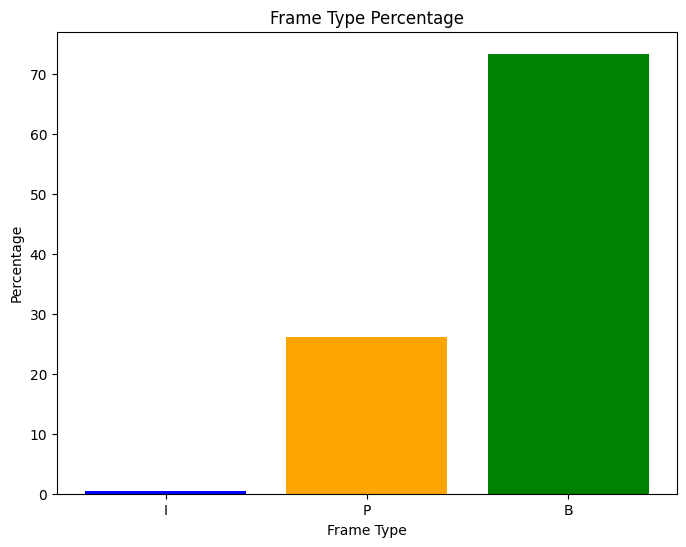

{'I': 0.4172461752433936, 'P': 26.14742698191933, 'B': 73.43532684283728}


In [ ]:
import subprocess
import json
import matplotlib.pyplot as plt

def analyze_frame_types(video_path):
    command = ['ffprobe', '-v', 'error', '-select_streams', 'v:0', '-show_entries', 'frame=pict_type', '-of', 'json', video_path]
    result = subprocess.run(command, capture_output=True, text=True)
    frames_info = json.loads(result.stdout)
    frame_types = {'I': 0, 'P': 0, 'B': 0}

    for frame in frames_info['frames']:
        if 'pict_type' in frame:
            pict_type = frame['pict_type']
            if pict_type in frame_types:
                frame_types[pict_type] += 1

    total_frames = sum(frame_types.values())
    frame_percentages = {k: (v / total_frames) * 100 for k, v in frame_types.items()}

    return frame_percentages

def plot_bar_chart(frame_percentages):
    frame_labels = list(frame_percentages.keys())
    frame_values = [frame_percentages[frame] for frame in frame_percentages]
    plt.figure(figsize=(8, 6))
    plt.bar(frame_labels, frame_values, color=['blue', 'orange', 'green'])
    plt.xlabel('Frame Type')
    plt.ylabel('Percentage')
    plt.title('Frame Type Percentage')
    plt.show()

video_path = 'good.mov'
frame_percentages = analyze_frame_types(video_path)
plot_bar_chart(frame_percentages)
print(frame_percentages)


Lab Task 3: Visualizing **Frames**

In [26]:
import subprocess
import os
def extract_frames(video_path, output_dir, frame_type):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    if frame_type == 'I':
        filter_expr = "select='eq(pict_type,I)'"
        output_pattern = 'I_frame_%04d.png'
    elif frame_type == 'P':
        filter_expr = "select='eq(pict_type,P)'"
        output_pattern = 'P_frame_%04d.png'
    elif frame_type == 'B':
        filter_expr = "select='eq(pict_type,B)'"
        output_pattern = 'B_frame_%04d.png'
    else:
        raise ValueError("Invalid frame type. Choose from 'I', 'P', or 'B'.")
    output_path = os.path.join(output_dir, output_pattern)
    command = [
        'ffmpeg', '-i', video_path, '-vf', filter_expr,'-vsync',
        'vfr',output_path]
    try:
        subprocess.run(command, check=True)
        print(f"Frames extracted to {output_dir}")
    except subprocess.CalledProcessError as e:
        print(f"Error extracting frames: {e}")
video_file = 'good.mov'
output_directory = 'frames'
extract_frames(video_file, output_directory, 'I')
extract_frames(video_file, output_directory, 'P')
extract_frames(video_file, output_directory, 'B')

Frames extracted to frames
Frames extracted to frames
Frames extracted to frames


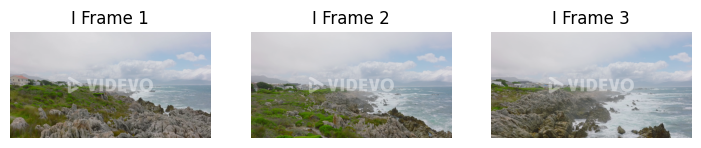

 I frames found.


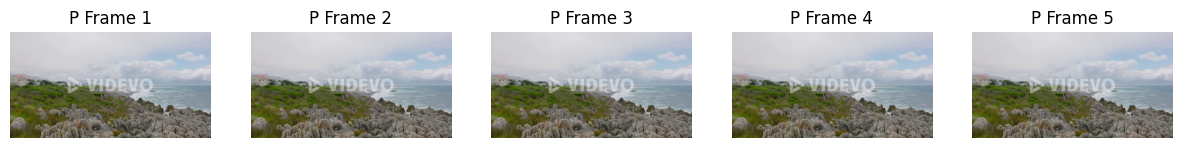

 P frames found.


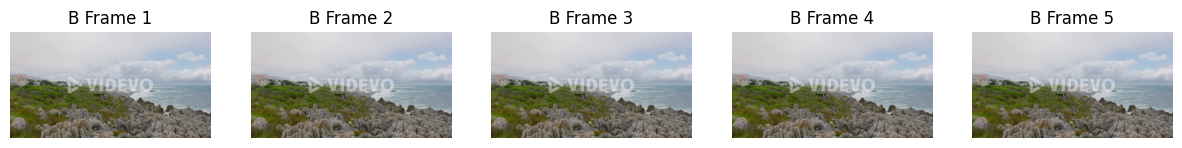

 B frames found.


In [35]:
import matplotlib.pyplot as plt
from PIL import Image
import glob
import os
def display_frames(frame_dir, frame_type):
    frame_files = sorted(glob.glob(os.path.join(frame_dir, f'{frame_type}_frame_*.png')))
    if frame_files:
        plt.figure(figsize=(15, 5))
        for i, frame_file in enumerate(frame_files[:5]):
            img = Image.open(frame_file)
            plt.subplot(1, 5, i+1)
            plt.imshow(img)
            plt.axis('off')
            plt.title(f'{frame_type} Frame {i+1}')
        plt.show()
        print(f" {frame_type} frames found.")

display_frames(output_directory, 'I')
display_frames(output_directory, 'P')
display_frames(output_directory, 'B')

Lab Task 4: Frame Compression **Analysis**

In [38]:
import os
import glob

def calculate_frame_sizes(frame_dir, frame_type):
    frame_files = glob.glob(os.path.join(frame_dir, f'{frame_type}_frame_*.png'))
    if not frame_files:
        print(f"No {frame_type} frames found.")
        return 0, 0

    sizes = [os.path.getsize(frame_file) for frame_file in frame_files]
    avg_size = sum(sizes) / len(sizes)
    return avg_size, sizes
output_directory = 'frames'

avg_size_I, _ = calculate_frame_sizes(output_directory, 'I')
avg_size_P, _ = calculate_frame_sizes(output_directory, 'P')
avg_size_B, _ = calculate_frame_sizes(output_directory, 'B')

print(f"Average size of I frames: {avg_size_I / 1024:.2f} KB")
print(f"Average size of P frames: {avg_size_P / 1024:.2f} KB")
print(f"Average size of B frames: {avg_size_B / 1024:.2f} KB")

Average size of I frames: 1212.83 KB
Average size of P frames: 1227.22 KB
Average size of B frames: 1203.11 KB


2.	Compression Efficiency:

I FRAME - I frames as standalone pictures. They contain the entire image just like a regular photo.Since they have all the information needed to display a full picture, I frames are large in size.example :- flipbook

B FRAME -B Frames are the most efficient, storing minimal changes by using information from both past and future frames, making them the smallest.

P FRAME -P Frames only store changes from the previous frame, making them smaller.

**Why P and B Frames Are Generally Smaller Than I Frames?**

I frames are big because they are like a full picture that contains all the details. They don’t rely on any other frames, so they must store everything.

P frames are smaller because they don't need to store the whole picture. They just keep track of what has changed from the previous frame

B frames are the smallest because they are super-efficient. They look at both the previous and next frames to decide what to save.They compress the data the most.

Lab Task 5: Advanced Frame **Extraction**

I frames


In [42]:
import subprocess
import os

def extract_i_frames(video_file, output_dir):

    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    command = ['ffmpeg','-i', video_file,'-vf', 'select=eq(pict_type\\,I)','-vsync', 'vfr',os.path.join(output_dir, 'i_frame_%04d.png')  ]
    subprocess.run(command, check=True)


extract_i_frames('good.mov', 'i_frames')


In [40]:
import subprocess

def create_video_from_i_frames(frame_dir, output_video, frame_rate=10):

    command = ['ffmpeg','-framerate', str(frame_rate),  '-i', os.path.join(frame_dir, 'i_frame_%04d.png'),  '-c:v', 'libx264',   '-pix_fmt', 'yuv420p',  output_video   ]
    subprocess.run(command, check=True)

create_video_from_i_frames('i_frames', 'i.mp4')
